In [1]:
import numpy as np
import matplotlib.pyplot as plt

from LabToolbox.misc import PrintResult, histogram
from LabToolbox.fit import lin_fit, model_fit
from LabToolbox.uncertainty import propagate_uncertainty

%config InlineBackend.figure_formats = ['svg'] # <-- Qualità 'svg' dei plot.

# Modulo `LabToolbox.misc`

Funzione `PrintResult`

In [2]:
x = 1.264382
sigmax = 0.357

# i dati di esempio rappresentando il valore misurato della corrente (in ampere) in un circuito con la relativa incertezza.
# questi però non sono formattati correttamente.

In [3]:
PrintResult(x, sigmax, name = "Corrente", ux = "A")

# questa funzione permette di stampare su schermo il valore correttamente formattato (con la sigma avente due cifre significative).
# tra parentesi quadre vi è l'incertezza relativa della misura.
# ulteriori descrizioni delle variabili di `histogram` sono disponibili trascinando il cursore sopra la funzione stessa.

Corrente = (1.26 ± 0.36) A [28.57%]


Funzione `histogram`

In [4]:
np.random.seed(0)
x = np.random.normal(100, 7, size = (50))
# i dati generati possono rappresentare, per esempio, i valori della massa di una mela (in grammi) misurati con una bilancia.
# questo tipo di misurazioni presentano una distribuzione gaussiana.

La skewness di questo istogramma è: -0.13
La curtosi di questo istogramma è: -0.49


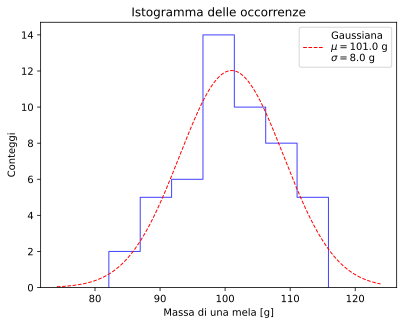

In [5]:
histogram(x, sigmax = x.std(), ux = "g", xlabel = "Massa di una mela")

# questa funzione costruisce un istogramma delle occorrenze per una determinata variabile.
# il numero di bin dell'istogramma viene automaticamente calcolato dalla funzione.
# sovrapposta all'istogramma, si presenterà una gaussiana con parametro \mu = x.mean() e \sigma = sigmax.
# ulteriori descrizioni delle variabili di `histogram` sono disponibili trascinando il cursore sopra la funzione stessa.

# Modulo `LabToolbox.fit`

Funzione `lin_fit`

In [6]:
# Generazione dei dati di esempio
np.random.seed(0)  # Per rendere l'esempio riproducibile
x = np.linspace(0, 10, 20)  # 20 punti equidistanti tra 0 e 10
y = 2.5 * x + 1.5 + np.random.normal(0, 2, size=x.shape)  # dati di esempio

np.random.seed(1)
sy = np.random.uniform(1.5, 2.5, size=len(y))  # Incertezze tra ±1.5 e ±2.5

χ²/dof = 0.85
p-value = 64.01%
Percentuale di residui compatibili con zero: 80.0%


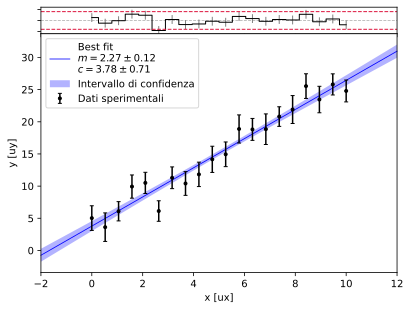

In [7]:
m, c, sigma_m, sigma_c, chi2_red, p_value = lin_fit(x = x, y = y, sy = sy, sx = None, fitmodel = "wls", residuals = True)

# questa funzione permette di eseguire un fit lineare ai dati y(x). se `residuals = True`, al di sopra del fit comparirà un pannello con i residui normalizzati. 
# la linea nera rappresenta il valore del residui normalizzato, mentre la barra grigia indica un'errore di 1. La linea rossa tratteggiata indica l'intervallo di confidenza [-2,+2].
# ulteriori descrizioni delle variabili di `lin_fit` sono disponibili trascinando il cursore sopra la funzione stessa.

Funzione `model_fit`

In [8]:
# Generazione dei dati di esempio
np.random.seed(0)  # Per rendere l'esempio riproducibile
x = np.linspace(0, 10, 20)  # 20 punti equidistanti tra 0 e 10
y = np.sin(2*x) + 1.5 + np.random.normal(0, 2, size=x.shape)  # dati di esempio

np.random.seed(1)
sy = np.random.uniform(1.5, 2.5, size=len(y))  # Incertezze tra ±1.5 e ±2.5

Parametro 1 = (1.15 +/- 0.113) [9.83%]
Parametro 2 = (2.67 +/- 0.41) [15.36%]
χ²/dof = 0.76
p-value = 74.60%
Percentuale di residui compatibili con zero: 85.0%


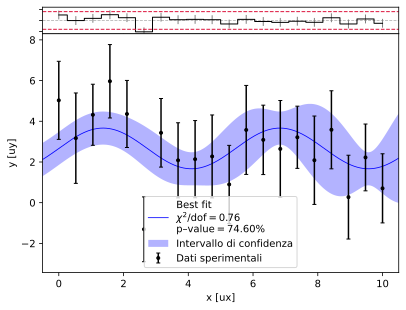

In [9]:
def funzione(x, a, b):
    return np.sin(a * x) + b

# ho definito la funzione secondo la quale dovrebbero distribuirsi i dati.
# 'a' e 'b' sono parametri liberi del fit, vanno messi dopo la variabile indipendente nell'argomento della funzione.
# la funzine `model_fit` permette una stima dei parametri 'a' e 'b'.

popt, perr, chi2_red, p_value = model_fit(x, y, sy, f = funzione, p0 = [1, 2], residuals=True, norm = True)

# p0 è una lista contenenti le guess iniziali dei parametri del modello.
# l'ordine dei parametri da inserire in `p0` è lo stesso definito nell'argomento di `function`.
# ulteriori descrizioni delle variabili di `model_fit` sono disponibili trascinando il cursore sopra la funzione stessa.

# Modulo `LabToolbox.uncertainty`

Funzione `propagate_uncertainty`

In [11]:
np.random.seed(0)
h = np.random.normal(5, 0.25, size = (10))
r = np.random.normal(7, 0.20, size = (10))

np.random.seed(1)
sh = np.random.uniform(0.15, 0.25, size=len(h))  # Incertezze tra ±1.5 e ±2.5
sr = np.random.uniform(0.1, 0.3, size=len(h))  # Incertezze tra 1 e 3

V = np.pi * r**2 * h 

# ho misurato 10 volte due determinate variabile (es: altezza di un cilindro e raggio in cm), ognuna con incertezza sh e sr.
# la variabile V è il volume di un cilindro (in cm^3).
# se ora voglio propagare le incertezze di h ed r su V, posso usare la funzione `propagate_uncertainty`.

def volume(altezza, raggio):
    return np.pi * raggio**2 * altezza**2

# ho definito la funzione che permette di calcolare il volume a partire dal raggio e dall'altezza.

V_value, sigma_V, _ = propagate_uncertainty(func = volume, x_arrays=[h, r], uncertainties = [sh, sr], params = None)

# ulteriori descrizioni delle variabili di `propagate_uncertainty` sono disponibili trascinando il cursore sopra la funzione stessa.

for i in range(len(V_value)):
    PrintResult(V_value[i], sigma_V[i], name = f"Volume (misura {i+1}-esima)", ux = "cm^3")

Volume (misura 1-esima) = (4590 ± 400) cm^3 [8.71%]
Volume (misura 2-esima) = (4340 ± 470) cm^3 [10.83%]
Volume (misura 3-esima) = (4420 ± 310) cm^3 [7.01%]
Volume (misura 4-esima) = (4790 ± 490) cm^3 [10.23%]
Volume (misura 5-esima) = (4720 ± 320) cm^3 [6.78%]
Volume (misura 6-esima) = (3550 ± 330) cm^3 [9.30%]
Volume (misura 7-esima) = (4590 ± 380) cm^3 [8.28%]
Volume (misura 8-esima) = (3750 ± 360) cm^3 [9.60%]
Volume (misura 9-esima) = (3880 ± 330) cm^3 [8.51%]
Volume (misura 10-esima) = (3810 ± 340) cm^3 [8.92%]
